In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
targets = []
docs = []
with open('movie-pang02.csv') as movies:
    for line in movies.readlines()[1:]:
        line_list = line.split(',')
        targets.append(line_list[0])
        docs.append(line_list[1].strip())


In [ ]:
targets =[1. if t=="Pos" else 0. for t in targets]


In [ ]:
targets[-4:]

[0.0, 0.0, 0.0, 0.0]

# Split into train and text

In [ ]:
from sklearn.model_selection import train_test_split


docs_train, docs_test, y_train, y_test = train_test_split(docs,
                                                          targets,
                                                          random_state=123,
                                                          test_size=0.2,
                                                          stratify=targets)

In [ ]:
train_test_split?

# TF-IDF Encoding

In [ ]:
tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    min_df = 10,
    max_features=5000,
    token_pattern=r'[a-z]+'
)

In [ ]:
X_train = tfidf.fit_transform(docs_train)
X_test = tfidf.transform(docs_test)

# Train the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import (accuracy_score,
                             recall_score,
                             precision_score,
                             f1_score,
                             confusion_matrix)

In [ ]:
def score(k, y_train, y_test, y_train_pred, y_test_pred):
    return {
            'k': k,
            'accuracy_train': accuracy_score(y_train_pred, y_train),
            'accuracy_test': accuracy_score(y_test_pred, y_test),
            'recall_train': recall_score(y_train_pred, y_train),
            'recall_test': recall_score(y_test_pred, y_test),
            'precision_train': precision_score(y_train_pred, y_train),
            'precision_test':precision_score(y_test_pred, y_test),
            'f1_train': f1_score(y_train_pred, y_train),
            'f1_test': f1_score(y_test_pred, y_test),
            'cm_train': confusion_matrix(y_train_pred, y_train),
            'cm_test': confusion_matrix(y_test_pred, y_test),
        }


In [ ]:
%%time

from tqdm.auto import tqdm


K_list = list(range(2,100))

results = []

for k in tqdm(K_list):
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    results.append(score(k, y_train, y_test, y_train_pred, y_test_pred))



  0%|          | 0/98 [00:00<?, ?it/s]

CPU times: user 57.8 s, sys: 4.52 s, total: 1min 2s
Wall time: 1min 9s


In [ ]:
print(f"K \t Acc(Train) \t  Acc(Test) \t Recall(Train) \t  Recall(Test) \t Precision(Train) \t  Precision(Test) \t F1(Train) \t  F1(Test) ")
for result in results:
    result_string = [f"{result[m]:.2f}"  for m in [
                                                    'k',
                                                    'accuracy_train',
                                                    'accuracy_test',
                                                    'recall_train',
                                                    'recall_test',
                                                    'precision_train',
                                                    'precision_test',
                                                    'f1_train',
                                                    'f1_test']]
    result_string = '\t\t'.join(result_string)
    print(f"{ result_string }")

K 	 Acc(Train) 	  Acc(Test) 	 Recall(Train) 	  Recall(Test) 	 Precision(Train) 	  Precision(Test) 	 F1(Train) 	  F1(Test) 
2.00		0.86		0.63		1.00		0.67		0.72		0.52		0.84		0.58
3.00		0.85		0.68		0.84		0.67		0.86		0.73		0.85		0.70
4.00		0.81		0.66		0.88		0.69		0.71		0.58		0.78		0.63
5.00		0.79		0.66		0.78		0.65		0.82		0.71		0.80		0.68
6.00		0.78		0.66		0.82		0.69		0.71		0.58		0.76		0.63
7.00		0.77		0.67		0.76		0.65		0.79		0.71		0.78		0.68
8.00		0.75		0.68		0.79		0.70		0.69		0.62		0.74		0.66
9.00		0.76		0.69		0.74		0.67		0.78		0.74		0.76		0.70
10.00		0.75		0.69		0.78		0.70		0.69		0.66		0.73		0.68
11.00		0.75		0.69		0.75		0.67		0.77		0.73		0.76		0.70
12.00		0.75		0.69		0.78		0.71		0.69		0.66		0.73		0.68
13.00		0.77		0.69		0.76		0.69		0.78		0.69		0.77		0.69
14.00		0.75		0.68		0.79		0.71		0.69		0.62		0.74		0.66
15.00		0.76		0.71		0.76		0.71		0.76		0.71		0.76		0.71
16.00		0.75		0.70		0.79		0.73		0.68		0.64		0.73		0.68
17.00		0.75		0.69		0.76		0.70		0.74		0.68		0.75		0.69
18.00		0.74		0.70		0.

In [ ]:
f1_max = 0
best_classifier = None
for result in results:
    if result['f1_test'] > f1_max:
        f1_max = result['f1_test']
        best_classifier = result

In [ ]:
best_classifier


{'k': 95,
 'accuracy_train': 0.74625,
 'accuracy_test': 0.78,
 'recall_train': 0.7774647887323943,
 'recall_test': 0.8373493975903614,
 'precision_train': 0.69,
 'precision_test': 0.695,
 'f1_train': 0.7311258278145695,
 'f1_test': 0.7595628415300545,
 'cm_train': array([[642, 248],
        [158, 552]]),
 'cm_test': array([[173,  61],
        [ 27, 139]])}

# Curva ROC e ponto de operação

True Negative: 173
False Negative: 27
True Positive: 139
False Positive: 61


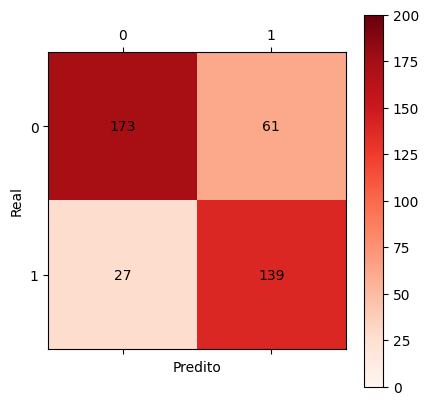

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
cm = best_classifier['cm_test']

tn, fp, fn, tp = cm.flatten()
plt.matshow(cm, cmap='Reds', interpolation='nearest', vmin=0, vmax=200)
plt.colorbar()
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, '{:d}'.format(z), ha='center', va='center')

plt.xlabel('Predito')

plt.ylabel('Real')

print(f'True Negative: {tn}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')
print(f'False Positive: {fp}')

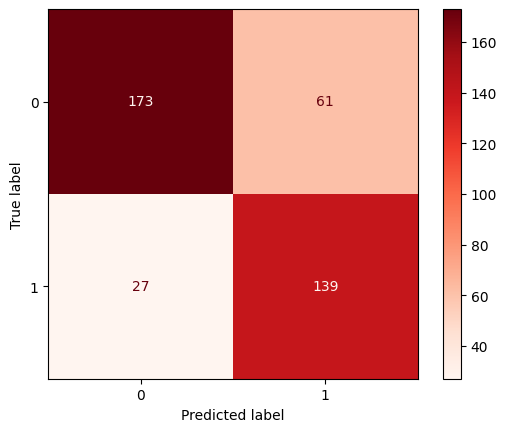

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot(cmap="Reds")

In [ ]:
k = best_classifier['k']
knn = KNeighborsClassifier(n_neighbors=best_classifier['k'], metric='cosine')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=95)

In [ ]:
y_train_hat = knn.predict_proba(X_train)
y_test_hat = knn.predict_proba(X_test)

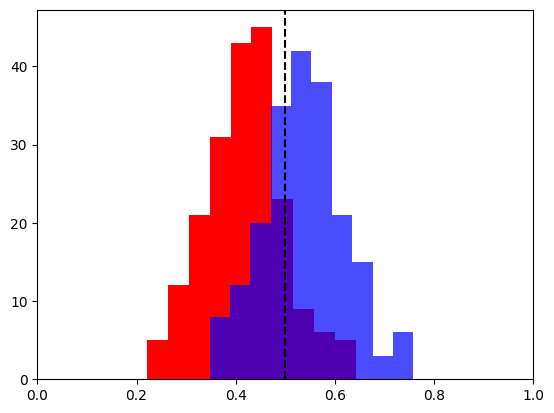

In [ ]:


neg_indices = np.where(np.array(y_test) == 0)[0]
pos_indices = np.where(np.array(y_test) == 1)[0]

plt.hist(y_test_hat[neg_indices][:, 1], color='red')
plt.hist(y_test_hat[pos_indices][:, 1], color='blue', alpha=.7)

plt.xlim([0, 1])
plt.axvline(.5, ymin=0, ymax=50, linestyle='--', c='black')


In [ ]:
threshold = 0.4

y_train_pred = (y_train_hat[:, 1] > threshold).astype(float)
y_test_pred = (y_test_hat[:, 1] > threshold).astype(float)

results = score(k, y_train, y_test, y_train_pred, y_test_pred)

cm_test = results['cm_test']
results

{'k': 95,
 'accuracy_train': 0.680625,
 'accuracy_test': 0.6975,
 'recall_train': 0.619520264681555,
 'recall_test': 0.6348122866894198,
 'precision_train': 0.93625,
 'precision_test': 0.93,
 'f1_train': 0.7456445993031359,
 'f1_test': 0.7545638945233266,
 'cm_train': array([[340,  51],
        [460, 749]]),
 'cm_test': array([[ 93,  14],
        [107, 186]])}

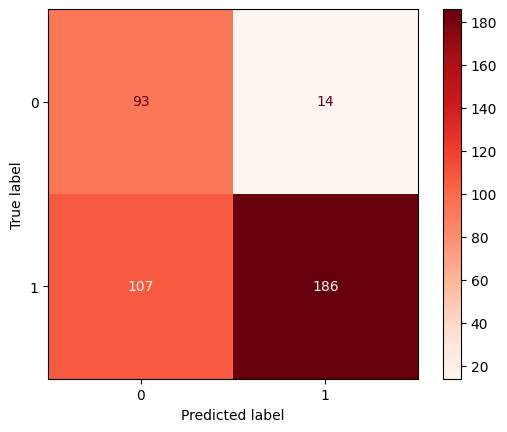

In [ ]:
ConfusionMatrixDisplay(cm_test).plot(cmap="Reds")

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_hat[:, 1])
roc_auc = roc_auc_score(y_test, y_test_hat[:, 1])


In [ ]:
f1_array = []
f1_max = 0
thr_ = thresholds[0]

for idx, threshold in enumerate(thresholds[1:]):
    y_test_pred = (y_test_hat[:, 1] > threshold).astype(float)
    f1 = f1_score(y_test, y_test_pred)
    f1_array.append(f1)
    if f1 > f1_max:

        f1_max = f1
        thr_ = threshold
        idx_max = idx
print( f"{thr_} : {f1_max:.2f}")

0.47368421052631576 : 0.78


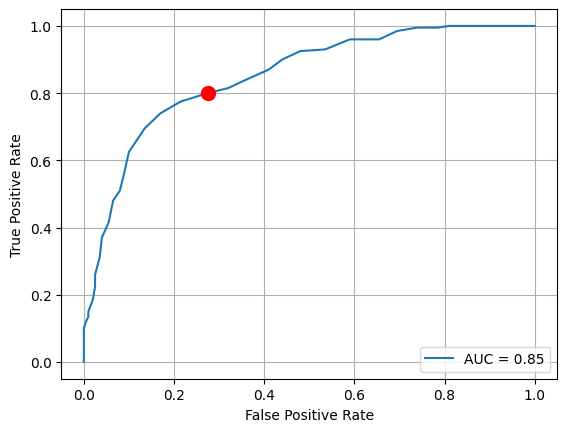

In [ ]:


display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

display.plot()

plt.plot(fpr[idx_max+1], tpr[idx_max+1], 'o', color='red', ms=10)
plt.grid()

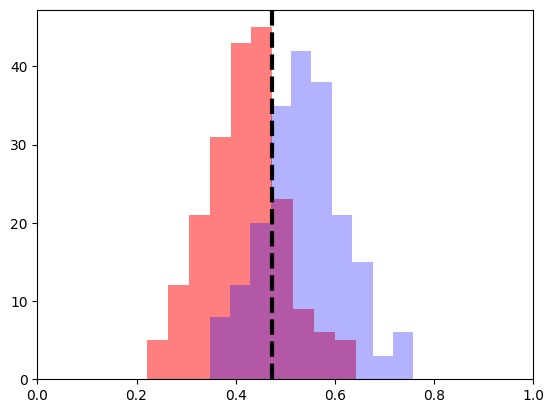

In [ ]:
neg_indices = np.where(np.array(y_test) == 0)[0]
pos_indices = np.where(np.array(y_test) == 1)[0]

plt.hist(y_test_hat[neg_indices][:, 1], color='red', alpha=.5)
plt.hist(y_test_hat[pos_indices][:, 1], color='blue', alpha=.3)

plt.xlim([0, 1])
plt.axvline(thr_, ymin=0, ymax=50, linestyle='--', c='black', lw=3)

0.69


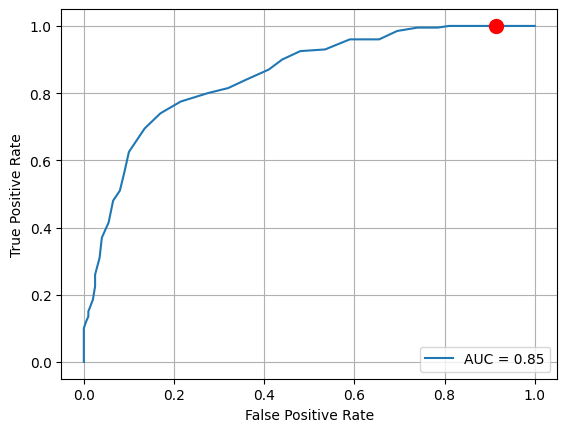

In [ ]:
idx = 38

thr_ = thresholds[idx]


display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

display.plot()

plt.plot(fpr[idx+1], tpr[idx+1], 'o', color='red', ms=10)
plt.grid()
print(f"{f1_array[idx]:.2f}")

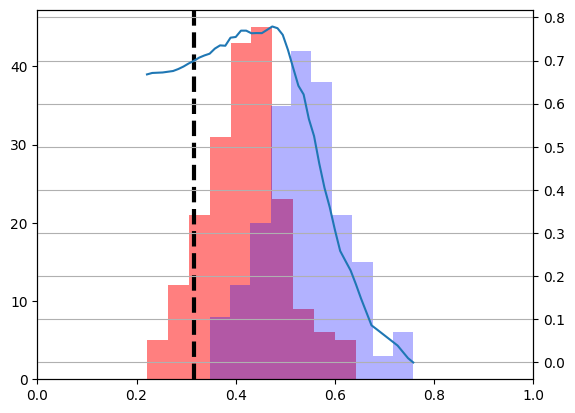

In [ ]:
neg_indices = np.where(np.array(y_test) == 0)[0]
pos_indices = np.where(np.array(y_test) == 1)[0]

plt.hist(y_test_hat[neg_indices][:, 1], color='red', alpha=.5)
plt.hist(y_test_hat[pos_indices][:, 1], color='blue', alpha=.3)

plt.xlim([0, 1])
plt.axvline(thr_, ymin=0, ymax=50, linestyle='--', c='black', lw=3)
ax2 = plt.gca().twinx()
ax2.plot(thresholds[1:], f1_array)
plt.grid()

# Validação Cruzada

In [ ]:
from sklearn.model_selection import KFold
from copy import deepcopy

In [ ]:
n_splits = 5

kfolds = KFold(n_splits = n_splits)

n_neighbors = 95

results = []
X_train = X_train
y_train = np.array(y_train)

for train_index, validation_idx in tqdm(kfolds.split(X_train)):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='cosine')

    X_train_ = X_train[train_index]
    y_train_ = y_train[train_index]
    X_val = X_train[validation_idx]
    y_val = y_train[validation_idx]
    knn.fit(X_train_, y_train_)
    y_train_pred = knn.predict(X_train_)
    y_val_pred = knn.predict(X_val)
    result = score(k, y_train_, y_val, y_train_pred, y_val_pred)
    result['model'] = deepcopy(knn)
    keys_to_delete = []
    result_val = {}
    for key, value in result.items():
        if '_test' in key:
            result_val[key.replace('_test', '_val')] = value
            keys_to_delete.append(key)

    for key in keys_to_delete:
        del result[key]
    result.update(result_val)

    results.append(result)




0it [00:00, ?it/s]

In [ ]:
scores_test_list = ["precision_val", "recall_val", "accuracy_val", "f1_val"]

print("My model is: ")
for s in scores_test_list:
    scores = []
    for result in results:
        scores.append(result[s])
    print(f"{s}: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

My model is: 
precision_val: 0.69 ± 0.06
recall_val: 0.77 ± 0.03
accuracy_val: 0.74 ± 0.02
f1_val: 0.72 ± 0.03


In [ ]:
f1_list = []
f1_max = 0
for result in results:
    f1_list.append(result["f1_val"])

idx_max = np.argmax(f1_list)

best_model = results[idx_max]['model']

y_test_pred = best_model.predict(X_test)

score(k, y_train_, y_test, y_train_pred, y_test_pred)

{'k': 95,
 'accuracy_train': 0.75546875,
 'accuracy_test': 0.75,
 'recall_train': 0.7691056910569106,
 'recall_test': 0.7840909090909091,
 'precision_train': 0.734472049689441,
 'precision_test': 0.69,
 'f1_train': 0.7513899920571883,
 'f1_test': 0.7340425531914891,
 'cm_train': array([[494, 171],
        [142, 473]]),
 'cm_test': array([[162,  62],
        [ 38, 138]])}